In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import random
import pickle
from tensorflow.keras.callbacks import TensorBoard

In [2]:
DIRECTORY=r'D:\jupyter\leaf disease\rice_leaf_diseases'
CATEGORIES=['Bacterial leaf','Brown spot','Leaf smut']

In [5]:
IMG_SIZE=100;
data=[]

for category in CATEGORIES:
    folder=os.path.join(DIRECTORY,category)
    label=CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
        data.append([img_arr,label])
        

In [65]:
len(data)

120

In [7]:
random.shuffle(data)

In [8]:
X=[]
Y=[]

for features,labels in data:
    X.append(features)
    Y.append(labels)

In [12]:
X=np.array(X)
Y=np.array(Y)

X=X/255

In [66]:
X.shape

print(Y)

[0 1 2 1 1 2 0 0 2 1 2 1 2 2 2 1 0 2 0 1 2 2 2 2 1 2 0 2 0 1 0 2 0 2 1 1 2
 2 0 2 0 1 2 1 0 1 1 0 0 2 1 1 0 0 1 1 1 0 0 2 2 2 2 0 1 2 0 2 1 0 1 2 2 1
 1 2 2 2 1 1 1 1 0 1 1 0 2 0 0 0 1 1 2 2 2 1 2 0 2 0 0 0 1 1 1 0 0 0 0 0 1
 0 2 0 1 0 0 1 0 2]


In [14]:
pickle.dump(data,open("dataset",'wb'))

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [16]:
model=Sequential()

model.add( Conv2D(64,(3,3), activation='relu' ) )
model.add( MaxPooling2D( (2,2) ) )

model.add( Conv2D(64,(3,3), activation='relu' ) )
model.add( MaxPooling2D( (2,2) ) )

model.add( Conv2D(64,(3,3), activation='relu' ) )
model.add( MaxPooling2D( (2,2) ) )

model.add( Flatten() )

model.add( Dense(128,input_shape=X.shape[1:],activation='relu') )
model.add(Dense(3,activation='softmax'))

In [17]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.fit(X,Y,epochs=15,validation_split=0.1)

Epoch 1/15
4/4 [==============================] - 1s 181ms/step - loss: 0.5492 - accuracy: 0.7315 - val_loss: 0.7424 - val_accuracy: 0.5000
Epoch 2/15
4/4 [==============================] - 1s 169ms/step - loss: 0.6691 - accuracy: 0.6852 - val_loss: 0.5217 - val_accuracy: 0.7500
Epoch 3/15
4/4 [==============================] - 1s 173ms/step - loss: 0.4715 - accuracy: 0.7870 - val_loss: 0.7118 - val_accuracy: 0.7500
Epoch 4/15
4/4 [==============================] - 1s 174ms/step - loss: 0.4304 - accuracy: 0.8148 - val_loss: 0.4162 - val_accuracy: 0.8333
Epoch 5/15
4/4 [==============================] - 1s 170ms/step - loss: 0.3204 - accuracy: 0.9074 - val_loss: 0.7924 - val_accuracy: 0.6667
Epoch 6/15
4/4 [==============================] - 1s 164ms/step - loss: 0.4104 - accuracy: 0.8333 - val_loss: 0.3727 - val_accuracy: 0.8333
Epoch 7/15
4/4 [==============================] - 1s 177ms/step - loss: 0.2733 - accuracy: 0.8704 - val_loss: 0.3454 - val_accuracy: 0.8333
Epoch 8/15
4/4 [====

In [25]:
model.save("my_model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: my_model\assets


In [77]:
predict_data=data[2]
x=predict_data[0]/255
x

array([[[0.8745098 , 0.88235294, 0.9254902 ],
        [0.8745098 , 0.89411765, 0.92941176],
        [0.8627451 , 0.87843137, 0.92156863],
        ...,
        [0.8745098 , 0.89019608, 0.93333333],
        [0.87058824, 0.88627451, 0.92941176],
        [0.87843137, 0.88627451, 0.92941176]],

       [[0.8745098 , 0.88235294, 0.9254902 ],
        [0.86666667, 0.88235294, 0.9254902 ],
        [0.87843137, 0.87843137, 0.9254902 ],
        ...,
        [0.89019608, 0.89803922, 0.9372549 ],
        [0.87843137, 0.88627451, 0.92941176],
        [0.87058824, 0.88627451, 0.92941176]],

       [[0.8745098 , 0.87843137, 0.93333333],
        [0.88235294, 0.89019608, 0.93333333],
        [0.8745098 , 0.88235294, 0.9254902 ],
        ...,
        [0.8745098 , 0.89019608, 0.9372549 ],
        [0.88627451, 0.89411765, 0.9372549 ],
        [0.85882353, 0.87058824, 0.9254902 ]],

       ...,

       [[0.8745098 , 0.88235294, 0.9254902 ],
        [0.88627451, 0.89803922, 0.92941176],
        [0.87843137, 0

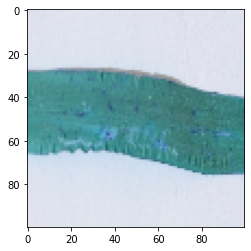

In [78]:
plt.imshow(x)

In [79]:
predictions=model.predict(np.array([x]))
predictions

array([[3.4188910e-05, 2.2503441e-02, 9.7746229e-01]], dtype=float32)

In [80]:
if(predictions[0][0]>0.8):
    print("Bacterial leaf")

if(predictions[0][1]>0.8):
    print("Brown spot")

if(predictions[0][2]>0.8):
    print("Leaf smut")


Leaf smut
